In [1]:
import numpy as np
import pandas as pd

In [2]:
import requests
import json
response_API = requests.get('https://data.cityofnewyork.us/resource/bug8-9f3g.json')

In [3]:
data=response_API.json()

In [4]:
df = pd.DataFrame(data)

In [5]:
q1=len(pd.unique(df['company_name']))

In [6]:
q2=df[df.city == 'Queens']['job_created']
q2=pd.to_numeric(q2.dropna()).sum()

In [7]:
email=df.company_email.str.split('@')

In [8]:
email.dropna(inplace=True)

In [9]:
email = email.to_list()

In [10]:
email[72]

['billieannplastics.com']

In [11]:
q3=[]
for i in range(len(email)):
    q3.append(email[i][-1])
    

In [12]:
q3 = len(set(q3))

In [13]:
df['total_savings']=pd.to_numeric(df.total_savings)

In [14]:
NTA=df.dropna(subset=['job_created', 'total_savings'], axis=0).groupby('nta')

In [15]:
sel=df['nta'].value_counts()>=5

In [16]:
sel=sel[sel == True].index.to_list()

In [17]:
job_created=NTA['job_created'].mean()
total_sav=NTA['total_savings'].mean()

In [18]:
q4=pd.DataFrame(job_created)

In [19]:
q4['total_sav']=total_sav

In [20]:
#import csv
#with open('q4.csv', 'w', newline = '') as q4:
#    my_writer = csv.writer(q4, delimiter = ' ')
#    my_writer.writerow(q4)

In [21]:
q4.to_csv('q4.csv')

In [22]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

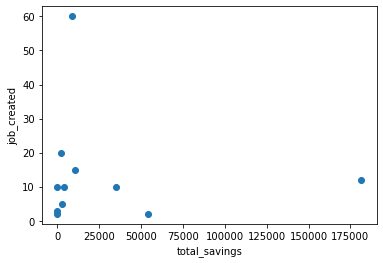

In [23]:
y=df.job_created
x=df.total_savings
plt.scatter(x,y)
plt.ylabel("job_created")
plt.xlabel("total_savings")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

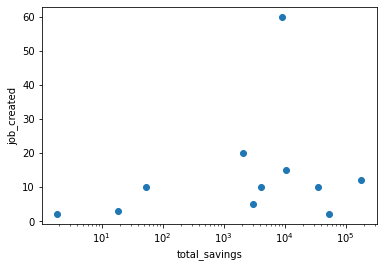

In [24]:
y=df.job_created
x=df.total_savings
plt.scatter(x,y)
plt.ylabel("job_created")
plt.xlabel("total_savings")
plt.xscale('log')
plt.show

In [29]:
import math
x=x[x != 0]
xlog=np.log10(x)
#xlog.replace([np.inf, -np.inf], np.nan, inplace=True)
#xlog.dropna(subset=["col1", "col2"], how="all", inplace=True)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  2.,
         2.,  0.,  1.,  1.,  2.,  6.,  4., 12.,  7., 13., 21., 30., 15.,
        22., 29., 29., 30., 23., 27., 30., 20., 23., 20., 17., 10.,  7.,
         6.,  7.,  5.,  3.,  1.,  4.,  4.,  1.,  4.,  2.,  1.]),
 array([0.26717173, 0.38574065, 0.50430957, 0.6228785 , 0.74144742,
        0.86001634, 0.97858526, 1.09715419, 1.21572311, 1.33429203,
        1.45286095, 1.57142987, 1.6899988 , 1.80856772, 1.92713664,
        2.04570556, 2.16427449, 2.28284341, 2.40141233, 2.51998125,
        2.63855018, 2.7571191 , 2.87568802, 2.99425694, 3.11282587,
        3.23139479, 3.34996371, 3.46853263, 3.58710156, 3.70567048,
        3.8242394 , 3.94280832, 4.06137724, 4.17994617, 4.29851509,
        4.41708401, 4.53565293, 4.65422186, 4.77279078, 4.8913597 ,
        5.00992862, 5.12849755, 5.24706647, 5.36563539, 5.48420431,
        5.60277324, 5.72134216, 5.83991108, 5.95848   , 6.07704893,
        6.19561785]),
 <BarContainer

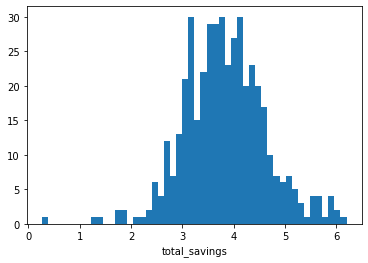

In [32]:
plt.xlabel("total_savings")
plt.hist(xlog,50)

In [33]:
df.columns

Index(['company_name', 'company_contact', 'company_email', 'company_phone',
       'address', 'city', 'state', 'zip', 'industry', 'industry_descr',
       'company_type', 'effective_date', 'total_savings',
       'savings_from_beginning', 'borough', 'latitude', 'longitude',
       'community_board', 'council_district', 'census_tract', 'bin', 'bbl',
       'nta', 'current_fulltime', 'job_created', 'job_retain'],
      dtype='object')

In [102]:
import datetime
import calendar
#month=datetime(df.effective_date, "%Y-%m-%d")
#datetime.datetime.strptime(df.effective_date[0], '%Y-%m-%d %H:%M:%S.%f')
#test=df.effective_date[8]

In [125]:
test=[]
for i in df.effective_date:
    test.append(datetime.datetime.strptime(i.replace('T', ' '), '%Y-%m-%d %H:%M:%S.%f').month)
    #datetime.datetime.strptime(i.replace('T', ' '), '%Y-%m-%d %H:%M:%S.%f')

In [126]:
df2=df.copy()

In [127]:
df2['effective_date']=test

In [128]:
month=df2.groupby('effective_date')['job_created'].sum()

In [129]:
month

effective_date
1        0
2     1215
3     1010
4        2
5        2
6      603
7       20
8        0
9        0
10       0
11       5
12      10
Name: job_created, dtype: object

In [132]:
month_name=[]
for i in month.index:
    month_name.append(calendar.month_name[i])

month.index = month_name

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

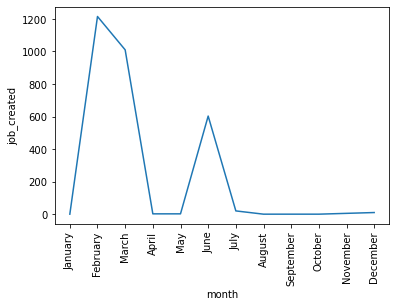

In [135]:
x=month.index
y=month
plt.plot(x,y)
plt.ylabel("job_created")
plt.xlabel("month")
plt.xticks(rotation = 90)